<a href="https://colab.research.google.com/github/DinhQuocTuan0108/Bai-tap/blob/main/buoi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=b01289a45eb463bc825bff1b9e47e95a671b565612b707e29c891bdcf785fe10
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
x=np.arange(11)
mfx=fuzz.trimf(x,[0,5,10])
x
mfx

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,26,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['nomal']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['nomal']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,14,18])
tip['nomal']=fuzz.trimf(tip.universe,[14,18,22])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])
food.view()
service.view()
tip.view()

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,26,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['nomal']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['nomal']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,14,18])
tip['nomal']=fuzz.trimf(tip.universe,[14,18,22])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])
rule1=ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor'] & service['nomal'],tip['less'])
rule3=ctrl.Rule(food['poor'] & service['good'],tip['nomal'])
rule4=ctrl.Rule(food['nomal'] & service['poor'],tip['less'])
rule5=ctrl.Rule(food['nomal'] & service['nomal'],tip['nomal'])
rule6=ctrl.Rule(food['nomal'] & service['good'],tip['much'])
rule7=ctrl.Rule(food['good'] & service['poor'],tip['nomal'])
rule8=ctrl.Rule(food['good'] & service['nomal'],tip['nomal'])
rule9=ctrl.Rule(food['good'] & service['good'],tip['much'])
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=10
tipping.compute()
print(tipping.output["tip"])
tip.view(sim=tipping)

90.0


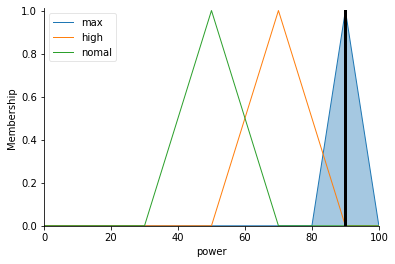

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time=ctrl.Antecedent(np.arange(10,101,1),'time')
rice=ctrl.Antecedent(np.arange(100,1001,1),'rice')
power=ctrl.Consequent(np.arange(0,101,1),'power')
time['very fast']=fuzz.trimf(time.universe,[10,10,30])
time['fast']=fuzz.trimf(time.universe,[20,30,40])
time['nomal']=fuzz.trimf(time.universe,[40,50,60])
time['slow']=fuzz.trimf(time.universe,[60,70,80])
time['very slow']=fuzz.trimf(time.universe,[70,100,100])
rice['very less']=fuzz.trimf(rice.universe,[100,100,300])
rice['less']=fuzz.trimf(rice.universe,[200,300,400])
rice['nomal']=fuzz.trimf(rice.universe,[400,500,600])
rice['much']=fuzz.trimf(rice.universe,[600,700,800])
rice['very much']=fuzz.trimf(rice.universe,[700,1000,1000])
power['max']=fuzz.trimf(power.universe,[80,90,100])
power['high']=fuzz.trimf(power.universe,[50,70,90])
power['nomal']=fuzz.trimf(power.universe,[30,50,70])
rule1=ctrl.Rule(time['very fast'] & rice['very less'],power['nomal'])
rule2=ctrl.Rule(time['very fast'] & rice['less'],power['nomal'])
rule3=ctrl.Rule(time['very fast'] & rice['nomal'],power['high'])
rule4=ctrl.Rule(time['very fast'] & rice['much'],power['max'])
rule5=ctrl.Rule(time['very fast'] & rice['very much'],power['max'])
rule6=ctrl.Rule(time['fast'] & rice['very less'],power['nomal'])
rule7=ctrl.Rule(time['fast'] & rice['less'],power['high'])
rule8=ctrl.Rule(time['fast'] & rice['nomal'],power['high'])
rule9=ctrl.Rule(time['fast'] & rice['much'],power['max'])
rule10=ctrl.Rule(time['fast'] & rice['very much'],power['max'])
rule11=ctrl.Rule(time['nomal'] & rice['very less'],power['nomal'])
rule12=ctrl.Rule(time['nomal'] & rice['less'],power['nomal'])
rule13=ctrl.Rule(time['nomal'] & rice['nomal'],power['nomal'])
rule14=ctrl.Rule(time['nomal'] & rice['much'],power['high'])
rule15=ctrl.Rule(time['nomal'] & rice['very much'],power['high'])
rule16=ctrl.Rule(time['slow'] & rice['very less'],power['nomal'])
rule17=ctrl.Rule(time['slow'] & rice['less'],power['nomal'])
rule18=ctrl.Rule(time['slow'] & rice['nomal'],power['high'])
rule19=ctrl.Rule(time['slow'] & rice['much'],power['high'])
rule20=ctrl.Rule(time['slow'] & rice['very much'],power['high'])
rule21=ctrl.Rule(time['very slow'] & rice['very less'],power['nomal'])
rule22=ctrl.Rule(time['very slow'] & rice['less'],power['nomal'])
rule23=ctrl.Rule(time['very slow'] & rice['nomal'],power['nomal'])
rule24=ctrl.Rule(time['very slow'] & rice['much'],power['high'])
rule25=ctrl.Rule(time['very slow'] & rice['very much'],power['max'])
cooking_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
cooking=ctrl.ControlSystemSimulation(cooking_ctrl)
cooking.input['rice']=1000
cooking.input['time']=10
cooking.compute()
print(cooking.output["power"])
power.view(sim=cooking)